# LIBRARIES

In [79]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd
from collections import Counter
from itertools import chain
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from transformers import RobertaConfig, RobertaModel
from transformers import RobertaTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request
from nltk import pos_tag
from nltk import RegexpParser
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/student/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# FUNCTIONS

In [2]:
def preprocessing(text):
    import re

    def remove_emojis(text):
        # Regular expression pattern to match emojis
        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # Emoticons
                                   u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
                                   u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                                   u"\U0001F1E0-\U0001F1FF"  # Flags (iOS)
                                   u"\U00002500-\U00002BEF"  # Chinese characters
                                   u"\U00002702-\U000027B0"
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   u"\U0001f926-\U0001f937"
                                   u"\U00010000-\U0010ffff"
                                   "\u2640-\u2642" 
                                   "\u2600-\u2B55"
                                   "\u200d"
                                   "\u23cf"
                                   "\u23e9"
                                   "\u231a"
                                   "\ufe0f"  # dingbats
                                   "\u3030"
                                   "]+", flags=re.UNICODE)

        # Remove emojis from the text
        text_without_emojis = emoji_pattern.sub(r'', text)
        return text_without_emojis
    
    text = text.replace("\n", " ")
    text = text.replace("!", " ")
    text = text.replace("@", "")
    text = text.replace(">", " ")
    text = text.replace("<", " ")
    text = text.replace("(", " ")
    text = text.replace(")", " ")
    text = text.replace("\t", " ")
    text = text.replace("/", " ")
    text = text.replace("~", " ")
    text = text.replace("\\", " ")
    text = text.replace("#", " ")
    text = text.replace(",", " ")
    text = text.replace("?", " ")
    text = text.replace("'", " ")
    text = text.replace("%", " ")
    text = " ".join(word for word in text.split() if not "http" in word)
    text = remove_emojis(text)  # Remove emojis using the remove_emojis function
    text = text.lower()
    return text

In [3]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if not word in stop_words]
    filtered_text = " ".join(filtered_tokens)
    return filtered_text

In [4]:
def stem_text(text):
    ps = PorterStemmer()
    tokens = nltk.word_tokenize(text)
    stemmed_tokens = [ps.stem(word) for word in tokens]
    stemmed_text = " ".join(stemmed_tokens)
    return stemmed_text

In [5]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    lemmatized_text = " ".join(lemmatized_tokens)
    return lemmatized_text

In [6]:
def normalize_text(text):
    normalized_text = text.lower()
    tokens = nltk.word_tokenize(normalized_text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    stemmer = PorterStemmer()
    normalized_tokens = [stemmer.stem(token) for token in filtered_tokens]

    normalized_text = convert_list_to_string(normalized_tokens, ' ')

    return normalized_text

In [7]:
def find_ngrams(input_list, n):
    return list(zip(*[input_list[i:] for i in range(n)]))

In [8]:
def convert_list_to_string(string_list, delimiter=''):
    combined_string = delimiter.join(string_list)
    return combined_string

In [9]:
# define a function to calculate the sentiment using TextBlob
def get_textblob_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [10]:
def get_sentiment(row):
    if row['textblob_sentiment'] > 0 :
        return 'positive'
    elif row['textblob_sentiment'] < 0 :
        return 'negative'
    else:
        return 'neutral'

In [11]:
# by accepting the input string as an argument
def countSpaces(inputString):
   # storing the count of the number of spaces in a given string
   spaces_count = 0
   # Traversing till the length of the string
   for index in range(0, len(inputString)):
   # checking whether each character of a string is blank/space or not
      if inputString[index] == " ":
        # incrementing the space value count by 1
        spaces_count += 1
   # returning the count of the number of spaces in an input string
   return spaces_count

# 2. Pre-Processing & Cleaning

### INSERTING DATASET

In [12]:
#Only first 500 rows
df = pd.read_csv('tweets.csv')[:500]
df

/var/folders/65/8s6jr14n0mn_0fzs8grp07980000gn/T/ipykernel_2223/295197866.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('tweets.csv')[:500]


,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
0,Bohmle,"#GPT4 for FREE. \nNo its not a clickbait, @Qol...",Carkingga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,AI enthusiast,2019-07-03 03:44:41+00:00,60.0,349.0,611,False,2023-05-17 18:11:12+00:00,"['GPT4', 'ChatGPT4']",Twitter Web App,NaN,NaN
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
3,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
4,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,O'Dwyer's PR News,#ChatGPT set off an endless stream of fear and...,"New York, NY","The #1 news outlet for public relations, publi...",2009-02-25 15:50:27+00:00,15013.0,2876.0,1,False,2023-05-17 16:00:37+00:00,['ChatGPT'],Twitter Web App
496,"Tracy Krauss, #author #artist #playwright",ChatGPT is a hot topic; there is no doubt. It ...,"British Columbia, Canada",I write modern Christian romance with a twist ...,2010-06-19 04:45:43+00:00,2718.0,1803.0,348,False,2023-05-17 16:00:37+00:00,NaN,Hootsuite Inc.
497,Tom Solid,Exciting news! #chatGPT has launched its Plugi...,Germany,🚀✨ We help you to build your productivity syst...,2010-12-04 11:00:53+00:00,3460.0,332.0,4464,False,2023-05-17 16:00:30+00:00,['chatGPT'],Hootsuite Inc.
498,Tweeting Monk,@Oncrawl Agreed! The #ChatGPT is definitely th...,GET 30% OFF FOR 3 MONTHS,Set your Twitter account on auto-pilot and wat...,2022-03-30 10:35:13+00:00,50.0,111.0,64,False,2023-05-17 16:00:28+00:00,['ChatGPT'],TweetingMonk


In [13]:
#Remove duplicate rows
df = df.drop_duplicates( keep='first')
#Remove rowns with missing values
df = df.dropna(axis=0)

In [14]:
df

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
3,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
4,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1
6,ScrapeLogo: acquired by RiteKit in 2015,Video : Show a company's logo based on the web...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,176.0,54.0,274,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App
7,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,I just used my #CerberusGPT HologeneticsLab an...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,123.0,299.0,8938,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App
...,...,...,...,...,...,...,...,...,...,...,...,...
493,Kristina Lucrezia Cornèr,"am i that lucky, or #chatGPT constantly makes ...","Veneto, Italy","See beyond, question more, believe in impossib...",2018-02-12 12:17:29+00:00,3028.0,483.0,1103,False,2023-05-17 16:00:54+00:00,['chatGPT'],Twitter Web App
494,Janice Portal | AI Enthusiast | Virtual Assistant,"Hi everyone, just want to share again my AI-ge...","Boracay, Philippines","Part-time Freelancer, Crypto & AI Enthusiast, ...",2023-03-07 16:18:50+00:00,14.0,74.0,33,False,2023-05-17 16:00:40+00:00,"['ChatGPT', 'OPENAI']",Twitter Web App
495,O'Dwyer's PR News,#ChatGPT set off an endless stream of fear and...,"New York, NY","The #1 news outlet for public relations, publi...",2009-02-25 15:50:27+00:00,15013.0,2876.0,1,False,2023-05-17 16:00:37+00:00,['ChatGPT'],Twitter Web App
497,Tom Solid,Exciting news! #chatGPT has launched its Plugi...,Germany,🚀✨ We help you to build your productivity syst...,2010-12-04 11:00:53+00:00,3460.0,332.0,4464,False,2023-05-17 16:00:30+00:00,['chatGPT'],Hootsuite Inc.


In [15]:
df = df.reset_index(drop=True)
df

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
0,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
1,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
2,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1
3,ScrapeLogo: acquired by RiteKit in 2015,Video : Show a company's logo based on the web...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,176.0,54.0,274,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App
4,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,I just used my #CerberusGPT HologeneticsLab an...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,123.0,299.0,8938,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App
...,...,...,...,...,...,...,...,...,...,...,...,...
269,Kristina Lucrezia Cornèr,"am i that lucky, or #chatGPT constantly makes ...","Veneto, Italy","See beyond, question more, believe in impossib...",2018-02-12 12:17:29+00:00,3028.0,483.0,1103,False,2023-05-17 16:00:54+00:00,['chatGPT'],Twitter Web App
270,Janice Portal | AI Enthusiast | Virtual Assistant,"Hi everyone, just want to share again my AI-ge...","Boracay, Philippines","Part-time Freelancer, Crypto & AI Enthusiast, ...",2023-03-07 16:18:50+00:00,14.0,74.0,33,False,2023-05-17 16:00:40+00:00,"['ChatGPT', 'OPENAI']",Twitter Web App
271,O'Dwyer's PR News,#ChatGPT set off an endless stream of fear and...,"New York, NY","The #1 news outlet for public relations, publi...",2009-02-25 15:50:27+00:00,15013.0,2876.0,1,False,2023-05-17 16:00:37+00:00,['ChatGPT'],Twitter Web App
272,Tom Solid,Exciting news! #chatGPT has launched its Plugi...,Germany,🚀✨ We help you to build your productivity syst...,2010-12-04 11:00:53+00:00,3460.0,332.0,4464,False,2023-05-17 16:00:30+00:00,['chatGPT'],Hootsuite Inc.


In [16]:
#Normalize Data And Clean Text Removing Emojies etc
df['preprocessed_text'] = df['text'].apply(preprocessing)

In [17]:
df['preprocessed_text'] = df['preprocessed_text'].apply(remove_stopwords)

In [18]:
df['preprocessed_text'] = df['preprocessed_text'].apply(stem_text)

In [19]:
df['preprocessed_text'] = df['preprocessed_text'].apply(lemmatize_text)

In [20]:
df['preprocessed_text']

0      chatgpt think 5 crypto coin explod year - yaho...
1      new : jwvanc post 5 startup includ vcinityinc ...
2      get binanc spot recommend : short ticker : ghs...
3      video : show compani logo base websit domain |...
4      use cerberusgpt hologeneticslab simul hologene...
                             ...                        
269    lucki chatgpt constantli make error point erro...
270    hi everyon want share ai-gener blog . t.co xgh...
271    chatgpt set endless stream fear despair closer...
272    excit news chatgpt launch plugin store mark co...
273    oncrawl agre chatgpt definit superior chatbot ...
Name: preprocessed_text, Length: 274, dtype: object

# 3. N-Grams analysis

### Bigrams

In [21]:
df['bigrams'] = df['preprocessed_text'].map(lambda x: find_ngrams(x.split(" "), 2))
df.head()

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,preprocessed_text,bigrams
0,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it,chatgpt think 5 crypto coin explod year - yaho...,"[(chatgpt, think), (think, 5), (5, crypto), (c..."
1,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App,new : jwvanc post 5 startup includ vcinityinc ...,"[(new, :), (:, jwvanc), (jwvanc, post), (post,..."
2,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1,get binanc spot recommend : short ticker : ghs...,"[(get, binanc), (binanc, spot), (spot, recomme..."
3,ScrapeLogo: acquired by RiteKit in 2015,Video : Show a company's logo based on the web...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,176.0,54.0,274,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App,video : show compani logo base websit domain |...,"[(video, :), (:, show), (show, compani), (comp..."
4,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,I just used my #CerberusGPT HologeneticsLab an...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,123.0,299.0,8938,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App,use cerberusgpt hologeneticslab simul hologene...,"[(use, cerberusgpt), (cerberusgpt, hologenetic..."


In [22]:
# Bigram Frequency Counts
bigrams = df['bigrams'].tolist()
bigrams = list(chain(*bigrams))
bigrams = [(x.lower(), y.lower()) for x,y in bigrams]

bigram_counts = Counter(bigrams)
bigram_counts.most_common(10)

[((':', 't.co'), 29),
 (('chatgpt', 't.co'), 26),
 (('.', 't.co'), 23),
 (('chatgpt', 'ai'), 22),
 (('power', 'chatgpt'), 22),
 (('openai', 't.co'), 20),
 (('&', 'amp'), 20),
 (('amp', ';'), 20),
 (('recommend', ':'), 20),
 (('ticker', ':'), 20)]

In [23]:
names = []
j=0
i=0
for i in range(10):
    names.append(bigram_counts.most_common(10)[i][j])
names

[(':', 't.co'),
 ('chatgpt', 't.co'),
 ('.', 't.co'),
 ('chatgpt', 'ai'),
 ('power', 'chatgpt'),
 ('openai', 't.co'),
 ('&', 'amp'),
 ('amp', ';'),
 ('recommend', ':'),
 ('ticker', ':')]

In [24]:
values = []

j=1
i=0
for i in range(10):
    values.append(bigram_counts.most_common(10)[i][j])
values

[29, 26, 23, 22, 22, 20, 20, 20, 20, 20]

In [25]:
# Printing original keys-value lists
print("Original key list is : " + str(names))
print("Original value list is : " + str(values))

Original key list is : [(':', 't.co'), ('chatgpt', 't.co'), ('.', 't.co'), ('chatgpt', 'ai'), ('power', 'chatgpt'), ('openai', 't.co'), ('&', 'amp'), ('amp', ';'), ('recommend', ':'), ('ticker', ':')]
Original value list is : [29, 26, 23, 22, 22, 20, 20, 20, 20, 20]


In [26]:
# using naive method
# to convert lists to dictionary
res = {}
for key in names:
    for value in values:
        res[key] = value
        values.remove(value)
        break

# Printing resultant dictionary
print("Resultant dictionary is : " + str(res))

Resultant dictionary is : {(':', 't.co'): 29, ('chatgpt', 't.co'): 26, ('.', 't.co'): 23, ('chatgpt', 'ai'): 22, ('power', 'chatgpt'): 22, ('openai', 't.co'): 20, ('&', 'amp'): 20, ('amp', ';'): 20, ('recommend', ':'): 20, ('ticker', ':'): 20}


([<matplotlib.axis.XTick at 0x29b924bb0>,
 [Text(0, 0, "(':', 't.co')"),
  Text(1, 0, "('chatgpt', 't.co')"),
  Text(2, 0, "('.', 't.co')"),
  Text(3, 0, "('chatgpt', 'ai')"),
  Text(4, 0, "('power', 'chatgpt')"),
  Text(5, 0, "('openai', 't.co')"),
  Text(6, 0, "('&', 'amp')"),
  Text(7, 0, "('amp', ';')"),
  Text(8, 0, "('recommend', ':')"),
  Text(9, 0, "('ticker', ':')")])

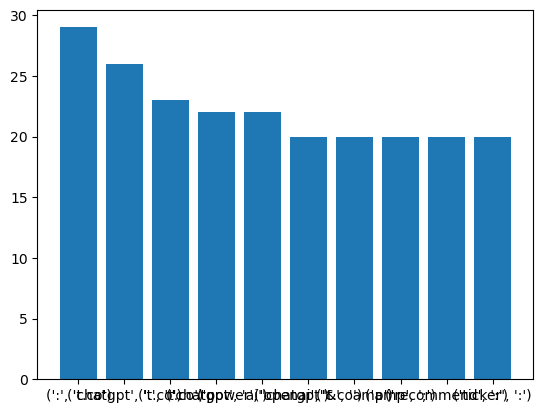

In [27]:
plt.bar(range(len(res)), list(res.values()), align='center')
plt.xticks(range(len(res)), list(res.keys()))

### Trigrams

In [28]:
df['trigrams'] = df['preprocessed_text'].map(lambda x: find_ngrams(x.split(" "), 3))
df.head()

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,preprocessed_text,bigrams,trigrams
0,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it,chatgpt think 5 crypto coin explod year - yaho...,"[(chatgpt, think), (think, 5), (5, crypto), (c...","[(chatgpt, think, 5), (think, 5, crypto), (5, ..."
1,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App,new : jwvanc post 5 startup includ vcinityinc ...,"[(new, :), (:, jwvanc), (jwvanc, post), (post,...","[(new, :, jwvanc), (:, jwvanc, post), (jwvanc,..."
2,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1,get binanc spot recommend : short ticker : ghs...,"[(get, binanc), (binanc, spot), (spot, recomme...","[(get, binanc, spot), (binanc, spot, recommend..."
3,ScrapeLogo: acquired by RiteKit in 2015,Video : Show a company's logo based on the web...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,176.0,54.0,274,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App,video : show compani logo base websit domain |...,"[(video, :), (:, show), (show, compani), (comp...","[(video, :, show), (:, show, compani), (show, ..."
4,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,I just used my #CerberusGPT HologeneticsLab an...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,123.0,299.0,8938,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App,use cerberusgpt hologeneticslab simul hologene...,"[(use, cerberusgpt), (cerberusgpt, hologenetic...","[(use, cerberusgpt, hologeneticslab), (cerberu..."


In [29]:
# Bigram Frequency Counts
trigrams = df['trigrams'].tolist()
trigrams = list(chain(*trigrams))
trigrams = [(x.lower(), y.lower() , z.lower()) for x,y,z in trigrams]

trigram_counts = Counter(trigrams)
trigram_counts.most_common(10)

[(('&', 'amp', ';'), 20),
 (('last', 'price', ':'), 20),
 (('power', 'chatgpt', '$'), 20),
 (('recommend', ':', 'short'), 18),
 ((':', 'short', 'ticker'), 18),
 (('short', 'ticker', ':'), 18),
 (('binanc', 'spot', 'recommend'), 15),
 (('spot', 'recommend', ':'), 15),
 (('time', 'interv', ':'), 15),
 (('gon', 'na', 'long'), 15)]

In [30]:
names = []
j=0
i=0
for i in range(10):
    names.append(trigram_counts.most_common(10)[i][j])
names

[('&', 'amp', ';'),
 ('last', 'price', ':'),
 ('power', 'chatgpt', '$'),
 ('recommend', ':', 'short'),
 (':', 'short', 'ticker'),
 ('short', 'ticker', ':'),
 ('binanc', 'spot', 'recommend'),
 ('spot', 'recommend', ':'),
 ('time', 'interv', ':'),
 ('gon', 'na', 'long')]

In [31]:
values = []

j=1
i=0
for i in range(10):
    values.append(trigram_counts.most_common(10)[i][j])
values

[20, 20, 20, 18, 18, 18, 15, 15, 15, 15]

In [32]:
# Printing original keys-value lists
print("Original key list is : " + str(names))
print("Original value list is : " + str(values))

Original key list is : [('&', 'amp', ';'), ('last', 'price', ':'), ('power', 'chatgpt', '$'), ('recommend', ':', 'short'), (':', 'short', 'ticker'), ('short', 'ticker', ':'), ('binanc', 'spot', 'recommend'), ('spot', 'recommend', ':'), ('time', 'interv', ':'), ('gon', 'na', 'long')]
Original value list is : [20, 20, 20, 18, 18, 18, 15, 15, 15, 15]


In [33]:
# using naive method
# to convert lists to dictionary
ser = {}
for key in names:
    for value in values:
        ser[key] = value
        values.remove(value)
        break

# Printing resultant dictionary
print("Resultant dictionary is : " + str(ser))

Resultant dictionary is : {('&', 'amp', ';'): 20, ('last', 'price', ':'): 20, ('power', 'chatgpt', '$'): 20, ('recommend', ':', 'short'): 18, (':', 'short', 'ticker'): 18, ('short', 'ticker', ':'): 18, ('binanc', 'spot', 'recommend'): 15, ('spot', 'recommend', ':'): 15, ('time', 'interv', ':'): 15, ('gon', 'na', 'long'): 15}


([<matplotlib.axis.XTick at 0x29bcdc0a0>,
 [Text(0, 0, "('&', 'amp', ';')"),
  Text(1, 0, "('last', 'price', ':')"),
  Text(2, 0, "('power', 'chatgpt', '$')"),
  Text(3, 0, "('recommend', ':', 'short')"),
  Text(4, 0, "(':', 'short', 'ticker')"),
  Text(5, 0, "('short', 'ticker', ':')"),
  Text(6, 0, "('binanc', 'spot', 'recommend')"),
  Text(7, 0, "('spot', 'recommend', ':')"),
  Text(8, 0, "('time', 'interv', ':')"),
  Text(9, 0, "('gon', 'na', 'long')")])

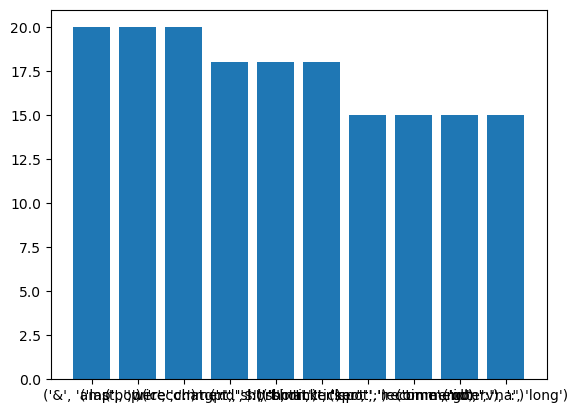

In [34]:
plt.bar(range(len(ser)), list(ser.values()), align='center')
plt.xticks(range(len(ser)), list(ser.keys()))

### WordCloud

In [35]:
x = df['preprocessed_text'].to_string(header=False,index=False).split('\n')
vals = [','.join(ele.split()) for ele in x]
print(vals)

['chatgpt,think,5,crypto,coin,explod,year,-,yahoo...', 'new,:,jwvanc,post,5,startup,includ,vcinityinc,1...', 'get,binanc,spot,recommend,:,short,ticker,:,ghst...', 'video,:,show,compani,logo,base,websit,domain,|,...', 'use,cerberusgpt,hologeneticslab,simul,hologenet...', 'time,sell,binanc,spot,recommend,:,short,ticker,...', 'andr,look,chatgpt,creat,ad,promot,ai,featur,&,a...', 'sell,binanc,spot,recommend,:,short,ticker,:,far...', 'timelin,go,wonki,blame,chatgpt,.,t.co,m5nuyfveec', 'time,sell,binanc,spot,recommend,:,short,ticker,...', 'chatgpt,1:28:30,ai,mommi,.,govern,proper,role,l...', 'ok,chatgpt,final,impress,.,work,articl,sake,art...', 'microsoft,corp.,control,openai,chief,execut,off...', 'hey,lasvega,lasvegaswaterauthor,chatgpt,say,wat...', 'rogan,matttaibbi,“,white,nationalist,’,s…,”,mis...', 'short,greed,binanc,spot,recommend,:,short,ticke...', 'get,binanc,spot,recommend,:,short,ticker,:,arus...', 'power,ai,like,chatgpt,grow,everi,day,.,respons,...', 'good,bargain,.,write,ultraru

In [36]:
result = convert_list_to_string(vals, ' ')
print(result)

chatgpt,think,5,crypto,coin,explod,year,-,yahoo... new,:,jwvanc,post,5,startup,includ,vcinityinc,1... get,binanc,spot,recommend,:,short,ticker,:,ghst... video,:,show,compani,logo,base,websit,domain,|,... use,cerberusgpt,hologeneticslab,simul,hologenet... time,sell,binanc,spot,recommend,:,short,ticker,... andr,look,chatgpt,creat,ad,promot,ai,featur,&,a... sell,binanc,spot,recommend,:,short,ticker,:,far... timelin,go,wonki,blame,chatgpt,.,t.co,m5nuyfveec time,sell,binanc,spot,recommend,:,short,ticker,... chatgpt,1:28:30,ai,mommi,.,govern,proper,role,l... ok,chatgpt,final,impress,.,work,articl,sake,art... microsoft,corp.,control,openai,chief,execut,off... hey,lasvega,lasvegaswaterauthor,chatgpt,say,wat... rogan,matttaibbi,“,white,nationalist,’,s…,”,mis... short,greed,binanc,spot,recommend,:,short,ticke... get,binanc,spot,recommend,:,short,ticker,:,arus... power,ai,like,chatgpt,grow,everi,day,.,respons,... good,bargain,.,write,ultrarun,maldiv,leadership... romanc,write,author,ai,chatgpt,re

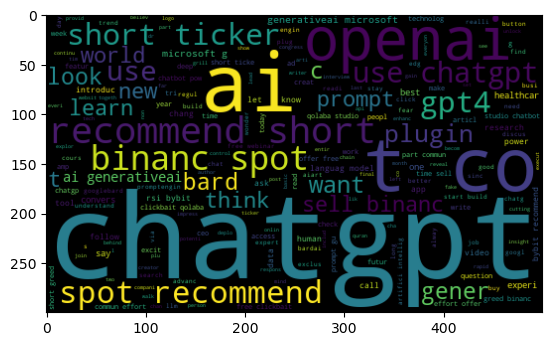

In [37]:
word_Cloud=WordCloud(width=500, height=300, random_state=21,
                     max_font_size=119).generate(result)

plt.imshow(word_Cloud, interpolation='bilinear')

# 4.Sentiment Analysis:Perform Sentimental Analysis on the text via Text Blob library

In [38]:
df['textblob_sentiment'] = df['preprocessed_text'].apply(get_textblob_sentiment)
df

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,preprocessed_text,bigrams,trigrams,textblob_sentiment
0,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it,chatgpt think 5 crypto coin explod year - yaho...,"[(chatgpt, think), (think, 5), (5, crypto), (c...","[(chatgpt, think, 5), (think, 5, crypto), (5, ...",0.000000
1,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App,new : jwvanc post 5 startup includ vcinityinc ...,"[(new, :), (:, jwvanc), (jwvanc, post), (post,...","[(new, :, jwvanc), (:, jwvanc, post), (jwvanc,...",-0.331818
2,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1,get binanc spot recommend : short ticker : ghs...,"[(get, binanc), (binanc, spot), (spot, recomme...","[(get, binanc, spot), (binanc, spot, recommend...",-0.012500
3,ScrapeLogo: acquired by RiteKit in 2015,Video : Show a company's logo based on the web...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,176.0,54.0,274,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App,video : show compani logo base websit domain |...,"[(video, :), (:, show), (show, compani), (comp...","[(video, :, show), (:, show, compani), (show, ...",-0.400000
4,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,I just used my #CerberusGPT HologeneticsLab an...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,123.0,299.0,8938,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App,use cerberusgpt hologeneticslab simul hologene...,"[(use, cerberusgpt), (cerberusgpt, hologenetic...","[(use, cerberusgpt, hologeneticslab), (cerberu...",-0.483333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,Kristina Lucrezia Cornèr,"am i that lucky, or #chatGPT constantly makes ...","Veneto, Italy","See beyond, question more, believe in impossib...",2018-02-12 12:17:29+00:00,3028.0,483.0,1103,False,2023-05-17 16:00:54+00:00,['chatGPT'],Twitter Web App,lucki chatgpt constantli make error point erro...,"[(lucki, chatgpt), (chatgpt, constantli), (con...","[(lucki, chatgpt, constantli), (chatgpt, const...",0.142857
270,Janice Portal | AI Enthusiast | Virtual Assistant,"Hi everyone, just want to share again my AI-ge...","Boracay, Philippines","Part-time Freelancer, Crypto & AI Enthusiast, ...",2023-03-07 16:18:50+00:00,14.0,74.0,33,False,2023-05-17 16:00:40+00:00,"['ChatGPT', 'OPENAI']",Twitter Web App,hi everyon want share ai-gener blog . t.co xgh...,"[(hi, everyon), (everyon, want), (want, share)...","[(hi, everyon, want), (everyon, want, share), ...",0.000000
271,O'Dwyer's PR News,#ChatGPT set off an endless stream of fear and...,"New York, NY","The #1 news outlet for public relations, publi...",2009-02-25 15:50:27+00:00,15013.0,2876.0,1,False,2023-05-17 16:00:37+00:00,['ChatGPT'],Twitter Web App,chatgpt set endless stream fear despair closer...,"[(chatgpt, set), (set, endless), (endless, str...","[(chatgpt, set, endless), (set, endless, strea...",-0.062500
272,Tom Solid,Exciting news! #chatGPT has launched its Plugi...,Germany,🚀✨ We help you to build your productivity syst...,2010-12-04 11:00:53+00:00,3460.0,332.0,4464,False,2023-05-17 16:00:30+00:00,['chatGPT'],Hootsuite Inc.,excit news chatgpt launch plugin store mark co...,"[(excit, news), (news, chatgpt), (chatgpt, lau...","[(excit, news, chatgpt), (news, chatgpt, launc...",0.200000


In [39]:
# Apply TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['preprocessed_text'])

In [40]:
X_tfidf

<274x1990 sparse matrix of type '<class 'numpy.float64'>'
	with 4638 stored elements in Compressed Sparse Row format>

In [41]:
# Apply Doc2Vec vectorization
documents = [TaggedDocument(doc.split(), [i]) for i, doc in enumerate(df['preprocessed_text'])]
doc2vec_model = Doc2Vec(documents, vector_size=100, window=2, min_count=1, workers=4, epochs=40)
X_doc2vec = [doc2vec_model.infer_vector(document.words) for document in documents]

In [42]:
df['sentiment'] = df.apply(get_sentiment, axis=1)
df.head()

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,preprocessed_text,bigrams,trigrams,textblob_sentiment,sentiment
0,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it,chatgpt think 5 crypto coin explod year - yaho...,"[(chatgpt, think), (think, 5), (5, crypto), (c...","[(chatgpt, think, 5), (think, 5, crypto), (5, ...",0.000000,neutral
1,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App,new : jwvanc post 5 startup includ vcinityinc ...,"[(new, :), (:, jwvanc), (jwvanc, post), (post,...","[(new, :, jwvanc), (:, jwvanc, post), (jwvanc,...",-0.331818,negative
2,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1,get binanc spot recommend : short ticker : ghs...,"[(get, binanc), (binanc, spot), (spot, recomme...","[(get, binanc, spot), (binanc, spot, recommend...",-0.012500,negative
3,ScrapeLogo: acquired by RiteKit in 2015,Video : Show a company's logo based on the web...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,176.0,54.0,274,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App,video : show compani logo base websit domain |...,"[(video, :), (:, show), (show, compani), (comp...","[(video, :, show), (:, show, compani), (show, ...",-0.400000,negative
4,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,I just used my #CerberusGPT HologeneticsLab an...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,123.0,299.0,8938,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App,use cerberusgpt hologeneticslab simul hologene...,"[(use, cerberusgpt), (cerberusgpt, hologenetic...","[(use, cerberusgpt, hologeneticslab), (cerberu...",-0.483333,negative


### RoBERTa

In [43]:
task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

In [44]:
tokenizer = AutoTokenizer.from_pretrained(MODEL)

In [45]:
# download label mapping
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

In [46]:
# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

In [47]:
df['preprocessed_text'][2]

'get binanc spot recommend : short ticker : ghstusdt time interv : 5min last price : 0.956 rsi : 88.3 power chatgpt $ ghst ghst alphaquarktoken gon na long wait short t.co qiqgtt11aa'

In [49]:
for i in range(len(df['preprocessed_text'])):
    text = preprocessing(df['preprocessed_text'][i])
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    for i in range(scores.shape[0]):
        l = labels[ranking[i]]
        s = scores[ranking[i]]
        print(f"{i+1}) {l} {np.round(float(s), 4)}")

1) neutral 0.8994
2) positive 0.0735
3) negative 0.0271
1) neutral 0.8923
2) positive 0.0616
3) negative 0.046
1) neutral 0.8276
2) negative 0.1314
3) positive 0.0409
1) neutral 0.8792
2) positive 0.0653
3) negative 0.0555
1) neutral 0.8206
2) negative 0.1444
3) positive 0.035
1) neutral 0.8423
2) negative 0.1172
3) positive 0.0405
1) neutral 0.889
2) negative 0.0651
3) positive 0.0458
1) neutral 0.8241
2) negative 0.1282
3) positive 0.0478
1) neutral 0.7277
2) negative 0.2344
3) positive 0.0379
1) neutral 0.8405
2) negative 0.1185
3) positive 0.041
1) neutral 0.8829
2) negative 0.0694
3) positive 0.0476
1) neutral 0.4722
2) negative 0.4089
3) positive 0.119
1) neutral 0.8718
2) negative 0.0948
3) positive 0.0334
1) neutral 0.6712
2) negative 0.2994
3) positive 0.0293
1) negative 0.5059
2) neutral 0.467
3) positive 0.0271
1) neutral 0.8402
2) negative 0.1201
3) positive 0.0397
1) neutral 0.8457
2) negative 0.1149
3) positive 0.0394
1) neutral 0.6481
2) positive 0.3316
3) negative 0.020

1) neutral 0.8467
2) negative 0.0869
3) positive 0.0664
1) neutral 0.5849
2) positive 0.3788
3) negative 0.0363
1) neutral 0.7706
2) negative 0.195
3) positive 0.0343
1) neutral 0.8855
2) positive 0.065
3) negative 0.0495
1) neutral 0.8691
2) negative 0.0883
3) positive 0.0426
1) neutral 0.8746
2) positive 0.0668
3) negative 0.0586
1) neutral 0.813
2) positive 0.1463
3) negative 0.0407
1) neutral 0.6891
2) positive 0.2979
3) negative 0.013
1) neutral 0.7255
2) positive 0.2612
3) negative 0.0134
1) positive 0.9589
2) neutral 0.0392
3) negative 0.0019
1) neutral 0.8251
2) negative 0.1047
3) positive 0.0702
1) neutral 0.6992
2) negative 0.2631
3) positive 0.0377
1) neutral 0.855
2) negative 0.0744
3) positive 0.0707
1) neutral 0.8703
2) negative 0.065
3) positive 0.0647
1) neutral 0.7448
2) positive 0.1967
3) negative 0.0585
1) neutral 0.8803
2) negative 0.081
3) positive 0.0387
1) positive 0.9317
2) neutral 0.0669
3) negative 0.0014
1) neutral 0.8522
2) negative 0.114
3) positive 0.0337


In [50]:
df['RoBERTa_sentiment'] = df['preprocessed_text'].apply(get_textblob_sentiment)
df

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,preprocessed_text,bigrams,trigrams,textblob_sentiment,sentiment,RoBERTa_sentiment
0,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it,chatgpt think 5 crypto coin explod year - yaho...,"[(chatgpt, think), (think, 5), (5, crypto), (c...","[(chatgpt, think, 5), (think, 5, crypto), (5, ...",0.000000,neutral,0.000000
1,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App,new : jwvanc post 5 startup includ vcinityinc ...,"[(new, :), (:, jwvanc), (jwvanc, post), (post,...","[(new, :, jwvanc), (:, jwvanc, post), (jwvanc,...",-0.331818,negative,-0.331818
2,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1,get binanc spot recommend : short ticker : ghs...,"[(get, binanc), (binanc, spot), (spot, recomme...","[(get, binanc, spot), (binanc, spot, recommend...",-0.012500,negative,-0.012500
3,ScrapeLogo: acquired by RiteKit in 2015,Video : Show a company's logo based on the web...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,176.0,54.0,274,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App,video : show compani logo base websit domain |...,"[(video, :), (:, show), (show, compani), (comp...","[(video, :, show), (:, show, compani), (show, ...",-0.400000,negative,-0.400000
4,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,I just used my #CerberusGPT HologeneticsLab an...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,123.0,299.0,8938,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App,use cerberusgpt hologeneticslab simul hologene...,"[(use, cerberusgpt), (cerberusgpt, hologenetic...","[(use, cerberusgpt, hologeneticslab), (cerberu...",-0.483333,negative,-0.483333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,Kristina Lucrezia Cornèr,"am i that lucky, or #chatGPT constantly makes ...","Veneto, Italy","See beyond, question more, believe in impossib...",2018-02-12 12:17:29+00:00,3028.0,483.0,1103,False,2023-05-17 16:00:54+00:00,['chatGPT'],Twitter Web App,lucki chatgpt constantli make error point erro...,"[(lucki, chatgpt), (chatgpt, constantli), (con...","[(lucki, chatgpt, constantli), (chatgpt, const...",0.142857,positive,0.142857
270,Janice Portal | AI Enthusiast | Virtual Assistant,"Hi everyone, just want to share again my AI-ge...","Boracay, Philippines","Part-time Freelancer, Crypto & AI Enthusiast, ...",2023-03-07 16:18:50+00:00,14.0,74.0,33,False,2023-05-17 16:00:40+00:00,"['ChatGPT', 'OPENAI']",Twitter Web App,hi everyon want share ai-gener blog . t.co xgh...,"[(hi, everyon), (everyon, want), (want, share)...","[(hi, everyon, want), (everyon, want, share), ...",0.000000,neutral,0.000000
271,O'Dwyer's PR News,#ChatGPT set off an endless stream of fear and...,"New York, NY","The #1 news outlet for public relations, publi...",2009-02-25 15:50:27+00:00,15013.0,2876.0,1,False,2023-05-17 16:00:37+00:00,['ChatGPT'],Twitter Web App,chatgpt set endless stream fear despair closer...,"[(chatgpt, set), (set, endless), (endless, str...","[(chatgpt, set, endless), (set, endless, strea...",-0.062500,negative,-0.062500
272,Tom Solid,Exciting news! #chatGPT has launched its Plugi...,Germany,🚀✨ We help you to build your productivity syst...,2010-12-04 11:00:53+00:00,3460.0,332.0,4464,False,2023-05-17 16:00:30+00:00,['chatG

In [51]:
#Choosing textblob sentiment because it gave better results
df['FinalSentiment'] = df['textblob_sentiment']

# 5. Feature Engineering

In [52]:
#Calculate number of words in text
for i in range(len(df['preprocessed_text'])):
    df['number of words in text'] = len(df['preprocessed_text'][i].split())

In [53]:
#Calculate the length of sentences
for i in range(len(df['preprocessed_text'])):
    df['length of sentences'] = len(df['preprocessed_text'][i])

In [54]:
#Calculate the number of spaces
for i in range(len(df['preprocessed_text'])):
    df['number of spaces'] = countSpaces(df['preprocessed_text'][i])

In [77]:
df

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,bigrams,trigrams,textblob_sentiment,sentiment,RoBERTa_sentiment,FinalSentiment,number of words in text,length of sentences,number of spaces,number of characters
0,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,...,"[(chatgpt, think), (think, 5), (5, crypto), (c...","[(chatgpt, think, 5), (think, 5, crypto), (5, ...",0.000000,neutral,0.000000,0.000000,15,106,14,92
1,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,...,"[(new, :), (:, jwvanc), (jwvanc, post), (post,...","[(new, :, jwvanc), (:, jwvanc, post), (jwvanc,...",-0.331818,negative,-0.331818,-0.331818,15,106,14,92
2,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,...,"[(get, binanc), (binanc, spot), (spot, recomme...","[(get, binanc, spot), (binanc, spot, recommend...",-0.012500,negative,-0.012500,-0.012500,15,106,14,92
3,ScrapeLogo: acquired by RiteKit in 2015,Video : Show a company's logo based on the web...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,176.0,54.0,274,False,2023-05-17 18:09:04+00:00,...,"[(video, :), (:, show), (show, compani), (comp...","[(video, :, show), (:, show, compani), (show, ...",-0.400000,negative,-0.400000,-0.400000,15,106,14,92
4,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,I just used my #CerberusGPT HologeneticsLab an...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,123.0,299.0,8938,False,2023-05-17 18:09:00+00:00,...,"[(use, cerberusgpt), (cerberusgpt, hologenetic...","[(use, cerberusgpt, hologeneticslab), (cerberu...",-0.483333,negative,-0.483333,-0.483333,15,106,14,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,Kristina Lucrezia Cornèr,"am i that lucky, or #chatGPT constantly makes ...","Veneto, Italy","See beyond, question more, believe in impossib...",2018-02-12 12:17:29+00:00,3028.0,483.0,1103,False,2023-05-17 16:00:54+00:00,...,"[(lucki, chatgpt), (chatgpt, constantli), (con...","[(lucki, chatgpt, constantli), (chatgpt, const...",0.142857,positive,0.142857,0.142857,15,106,14,92
270,Janice Portal | AI Enthusiast | Virtual Assistant,"Hi everyone, just want to share again my AI-ge...","Boracay, Philippines","Part-time Freelancer, Crypto & AI Enthusiast, ...",2023-03-07 16:18:50+00:00,14.0,74.0,33,False,2023-05-17 16:00:40+00:00,...,"[(hi, everyon), (everyon, want), (want, share)...","[(hi, everyon, want), (everyon, want, share), ...",0.000000,neutral,0.000000,0.000000,15,106,14,92
271,O'Dwyer's PR News,#ChatGPT set off an endless stream of fear and...,"New York, NY","The #1 news outlet for public relations, publi...",2009-02-25 15:50:27+00:00,15013.0,2876.0,1,False,2023-05-17 16:00:37+00:00,...,"[(chatgpt, set), (set, endless), (endless, str...","[(chatgpt, set, endless), (set, endless, strea...",-0.062500,negative,-0.062500,-0.062500,15,106,14,92
272,Tom Solid,Exciting news! #chatGPT has launched its Plugi...,Germany,🚀✨ We help you to build your productivity syst...,2010-12-04 11:00:53+00:00,3460.0,332.0,4464,False,2023-05-17 16:00:30+00:00,...,"[(excit, news), (news, chatgpt), (chatgpt, lau...","[(excit, news, chatgpt), (news, chatgpt, launc...",0.200000,positive,0.200000,0.200000,15,106,14,92


In [62]:
#Calculate the number of characters
for i in range(len(df['preprocessed_text'])):
    df['number of characters'] = len(df['preprocessed_text'][i]) - df['preprocessed_text'][i].count(" ")

# 6. Vectorization

In [ ]:
def remover(text):
    text_tokens = text.split(" ")
    final_list = [word for word in text_tokens if not word in stopwords_list]
    text = ' '.join(final_list)
    return text

def get_w2vdf(df):
    w2v_df = pd.DataFrame(df["sentences"]).values.tolist()
    for i in range(len(w2v_df)):
        w2v_df[i] = w2v_df[i][0].split(" ")
    return w2v_df

def train_w2v(w2v_df):
    cores = multiprocessing.cpu_count()
    w2v_model = Word2Vec(min_count=4,
                         window=4,
                         size=300, 
                         alpha=0.03, 
                         min_alpha=0.0007, 
                         sg = 1,
                         workers=cores-1)
    
    w2v_model.build_vocab(w2v_df, progress_per=10000)
    w2v_model.train(w2v_df, total_examples=w2v_model.corpus_count, epochs=100, report_delay=1)
    return w2v_model

df[["sentences"]] = df[["sentences"]].astype(str)
df["sentences"] = df["sentences"].apply(change_lower)
df["sentences"] = df["sentences"].apply(clean_data)
df["sentences"] = df["sentences"].apply(remover)

w2v_df = get_w2vdf(df)
w2v_model = train_w2v(w2v_df)
view raw

# 8

In [80]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_text'], df['FinalSentiment'], test_size=0.3, random_state=42)

In [81]:
# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [82]:
models = [
    ("LinearSVC", LinearSVC()),
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("MultinomialNB", MultinomialNB()),
    ("Random Forest", RandomForestClassifier(n_estimators=100)),
    ("Decision Tree", DecisionTreeClassifier())
]

In [84]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from textblob import TextBlob
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Define a function to extract features using CountVectorizer and TextBlob
def extract_features_countvect_textblob(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return [text, sentiment]

# Apply the function to the preprocessed_text column to extract features
df['features'] = df['preprocessed_text'].apply(extract_features_countvect_textblob)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['features'], df['sentiment'], test_size=0.2, random_state=42)

# Define a CountVectorizer object to extract features from text
count_vect = CountVectorizer()

# Transform the training and testing data using the CountVectorizer
X_train_counts = count_vect.fit_transform(X_train.apply(lambda x: x[0]))
X_test_counts = count_vect.transform(X_test.apply(lambda x: x[0]))

# Define a TfidfVectorizer object to extract features from text
tfidf_vect = TfidfVectorizer()

# Transform the training and testing data using the TfidfVectorizer
X_train_tfidf = tfidf_vect.fit_transform(X_train.apply(lambda x: x[0]))
X_test_tfidf = tfidf_vect.transform(X_test.apply(lambda x: x[0]))

# Define a LinearSVC model
svc_model = LinearSVC()

# Train and evaluate the model on the CountVectorizer features
svc_model.fit(X_train_counts, y_train)
y_pred = svc_model.predict(X_test_counts)
print("Results for CountVectorizer features:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted')}")

# Train and evaluate the model on the TfidfVectorizer features
svc_model.fit(X_train_tfidf, y_train)
y_pred = svc_model.predict(X_test_tfidf)
print("\nResults for TF-IDF features:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted')}")

Results for CountVectorizer features:
Accuracy: 0.6727272727272727
Precision: 0.6687700534759358
Recall: 0.6727272727272727
F1-Score: 0.6686713286713286

Results for TF-IDF features:
Accuracy: 0.6909090909090909
Precision: 0.7008264462809918
Recall: 0.6909090909090909
F1-Score: 0.6924242424242425
